In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip uninstall tensorflow -y
!pip install  tensorflow==2.13.0

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
!pip install tensorflow[and-cuda]==2.13.0
import tensorflow as tf
print(tf.__version__)

In [ ]:
cd /content/drive/MyDrive/python-ws

In [ ]:
!git clone https://github.com/tensorflow/models.git

In [ ]:
cd /content/drive/MyDrive/python-ws/models/research

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

In [ ]:
cd /content/drive/MyDrive/python-ws/models/research

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

In [ ]:
cd cocoapi/PythonAPI/

In [ ]:
!make

In [ ]:
cp -r pycocotools /content/drive/MyDrive/python-ws/models/research

In [ ]:
cd /content/drive/MyDrive/python-ws/workspace/training_demo

In [ ]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/python-ws/workspace/training_demo/models/ssd_mobilenet_v2_fpnlite_640 --pipeline_config_path=/content/drive/MyDrive/python-ws/workspace/training_demo/models/ssd_mobilenet_v2_fpnlite_640/pipeline.config

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/python-ws/workspace/training_demo/models/ssd_mobilenet_v2_fpnlite_640/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/python-ws/workspace/training_demo/models/ssd_mobilenet_v2_fpnlite_640 --output_directory /content/drive/MyDrive/python-ws/workspace/training_demo/exported-models/ssd_mobilenet_v2_fpnlite_640

In [ ]:
!zip -r "/content/drive/MyDrive/python-ws/workspace/training_demo/exported-models/ssd_mobilenet_v2_fpnlite_640.zip" "/content/drive/MyDrive/python-ws/workspace/training_demo/exported-models/ssd_mobilenet_v2_fpnlite_640"

In [ ]:
!pip install opencv-python

Cargando modelo...Listo! Llevo 12.861328840255737 segundos
Running inference for /content/drive/MyDrive/python-ws/workspace/training_demo/images/inference/img3.jpg... Listo


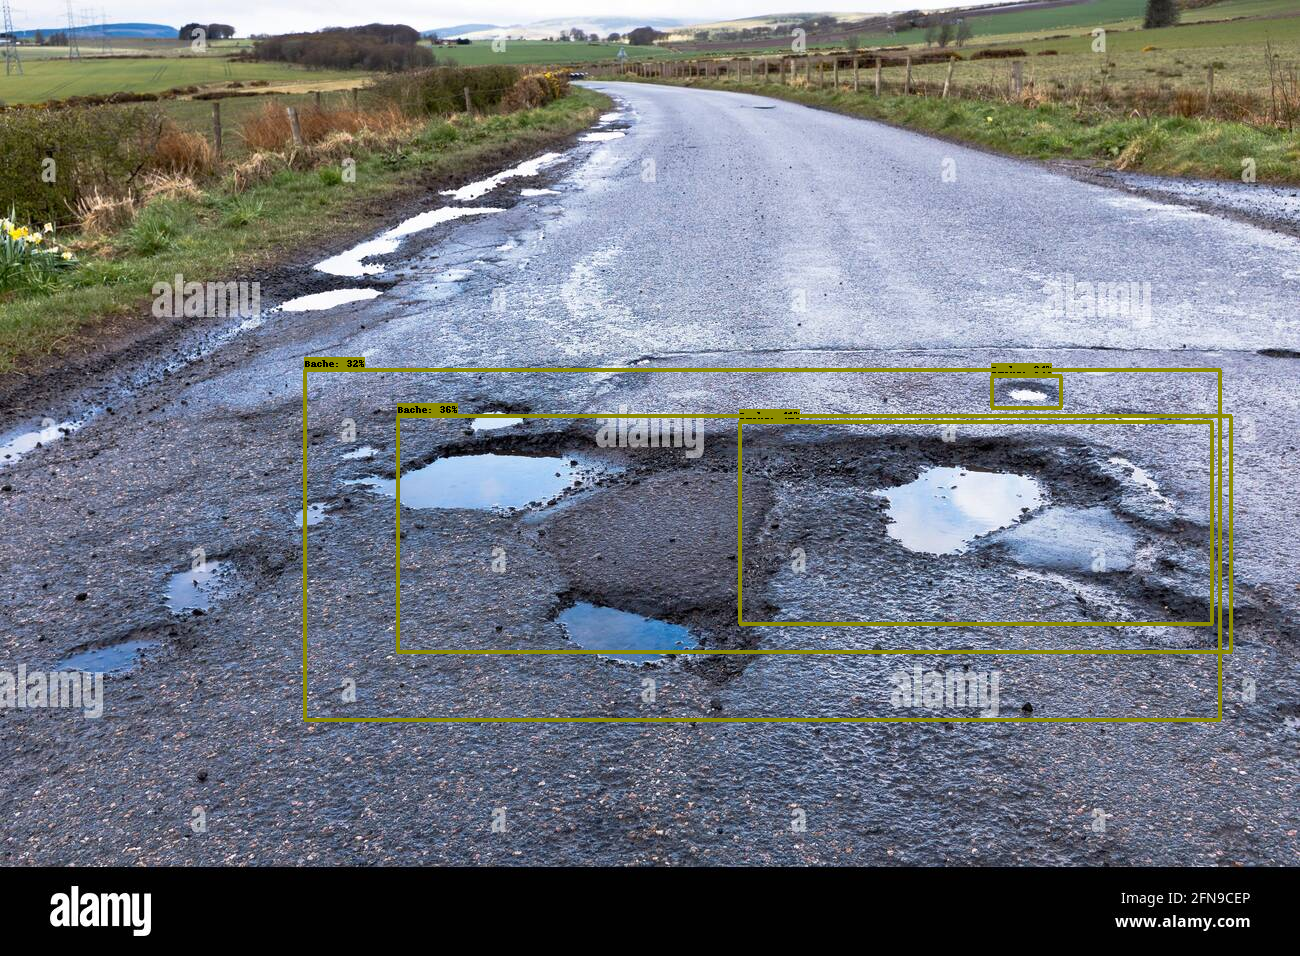

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

IMAGE_PATHS = '/content/drive/MyDrive/python-ws/workspace/training_demo/images/inference/img3.jpg'

PATH_TO_MODEL_DIR = '/content/drive/MyDrive/python-ws/workspace/training_demo/exported-models/ssd_mobilenet_v2_fpnlite_640'

PATH_TO_LABELS = '/content/drive/MyDrive/python-ws/workspace/training_demo/annotations/label_map.pbtxt'

MIN_CONF_THRESH = float(0.27)

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Cargando modelo...', end='')
start_time = time.time()

detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Listo! Llevo {} segundos'.format(elapsed_time))

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

input_tensor = tf.convert_to_tensor(image)

input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=50,
    min_score_thresh=MIN_CONF_THRESH,
    agnostic_mode=False)

print('Listo')
cv2_imshow(image_with_detections)